# Initial Exploration and Analysis

## Load the package and data

In [1]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the training data with features
train_dat = pd.read_parquet("data/processed/train_slam_with_features.parquet")

## Basic summary statistics

In [2]:
train_dat.info()
train_dat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5523159 entries, 0 to 5523158
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   token_id         object 
 1   token            object 
 2   token_pos        object 
 3   token_morph      object 
 4   token_dep_label  object 
 5   token_edges      object 
 6   token_wrong      int64  
 7   block_id         int64  
 8   prompt           object 
 9   user             object 
 10  countries        object 
 11  days             float64
 12  client           object 
 13  session          object 
 14  format           object 
 15  time             float64
 16  l2               object 
 17  l1               object 
 18  uni_lemma        object 
 19  growth_rate      float64
 20  median_aoa       float64
dtypes: float64(4), int64(2), object(15)
memory usage: 884.9+ MB

Number of unique users: 6447
Number of unique users by L1-L2 combination:
   l1  l2  user
0  en  es  2643
1  en  fr  1213
2  es  en  2593
Number of unique tokens: 7071
Number of unique tokens by L1-L2 combination:
   l1  l2  token
0  en  es   2914
1  en  fr   2177
2  es  en   2226

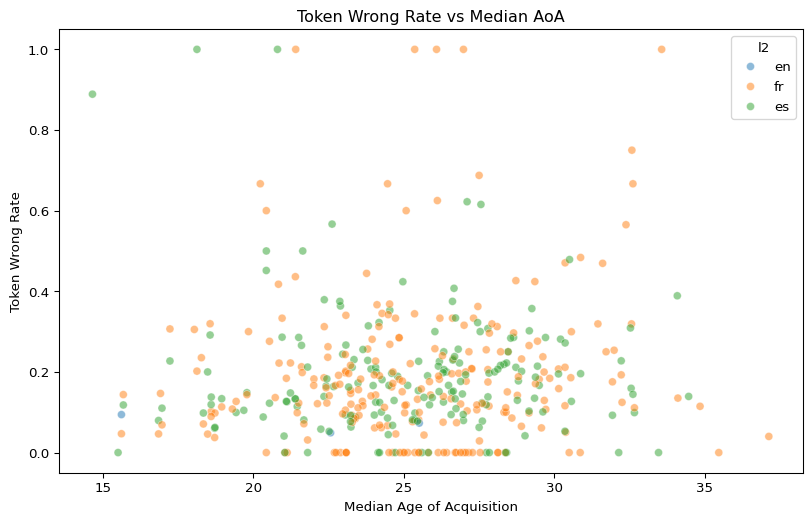

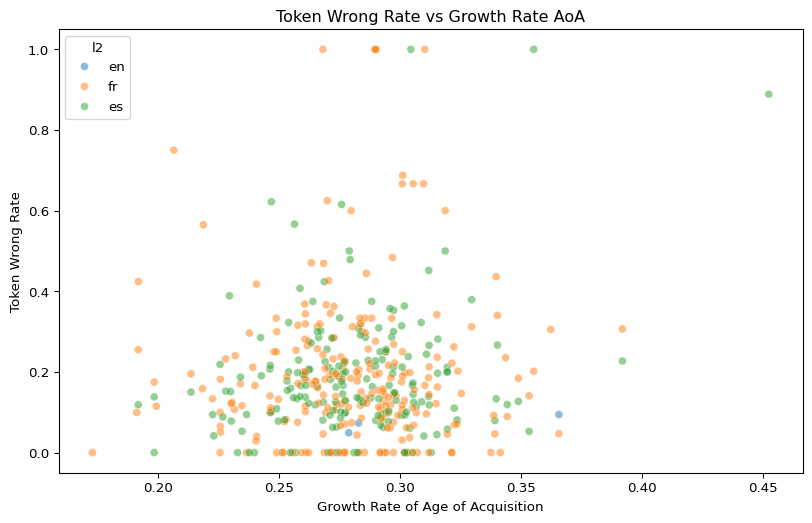

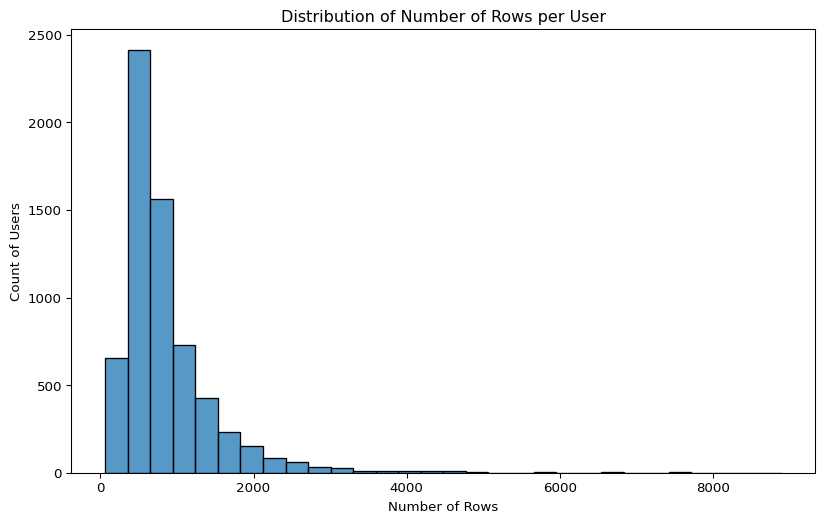

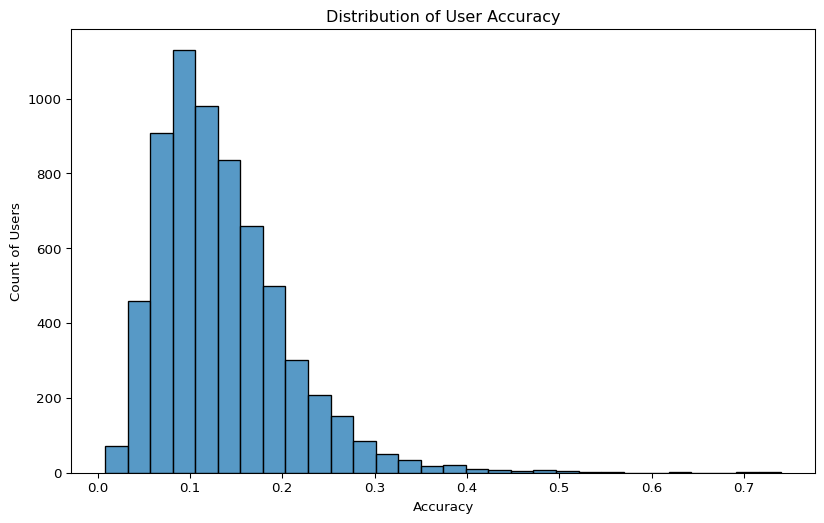

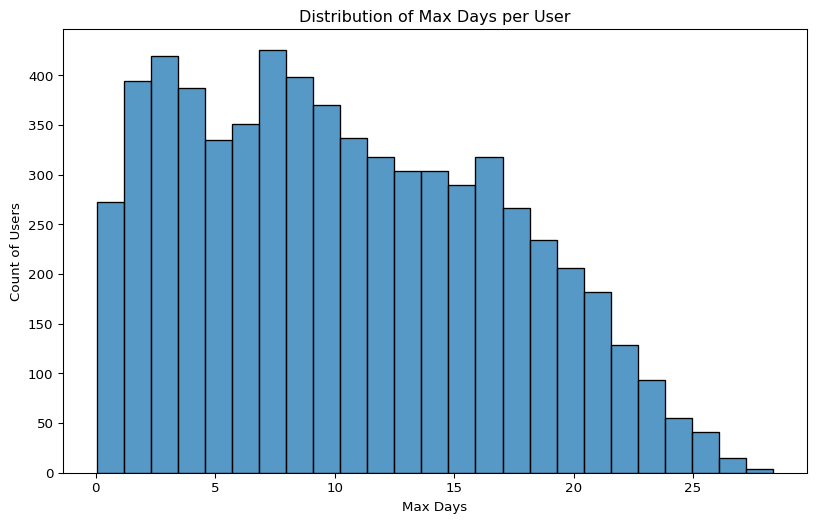

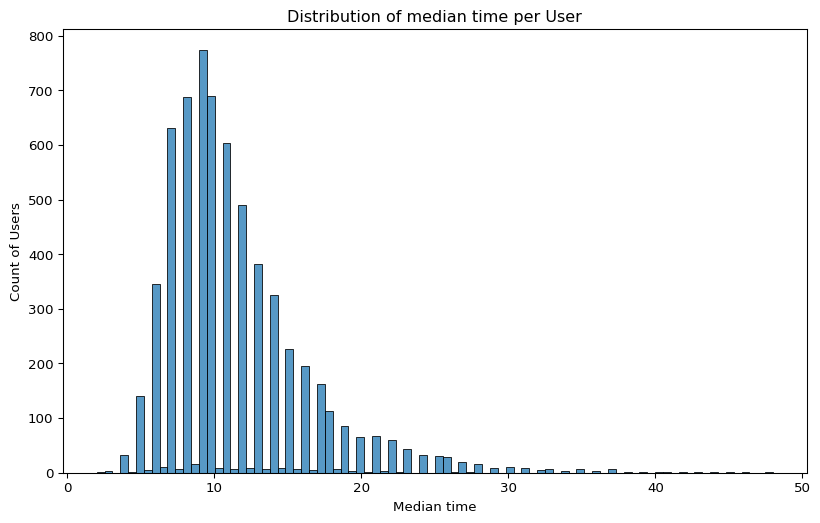

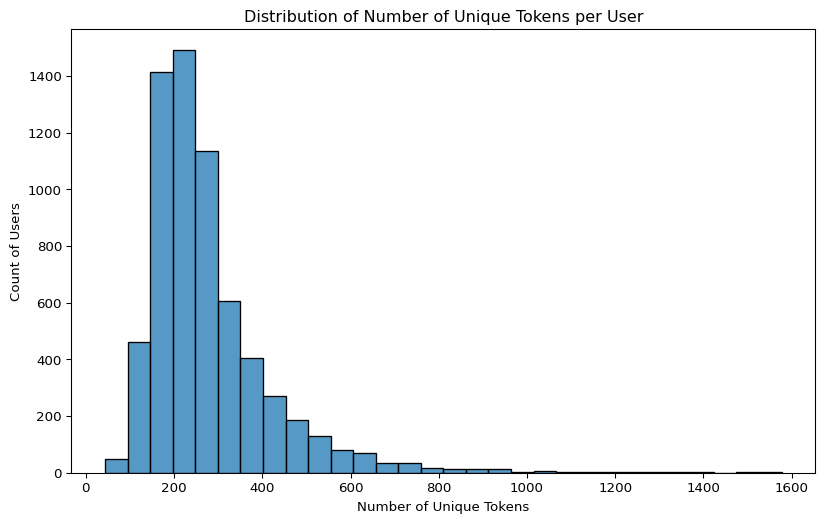

In [3]:
# Number of unique users
num_unique_users = train_dat['user'].nunique()
print(f"Number of unique users: {num_unique_users}")

# Number of unique users by l1-l2 combination
user_lang_stats = train_dat.groupby(['l1', 'l2'])['user'].nunique().reset_index()
print("Number of unique users by L1-L2 combination:")
print(user_lang_stats)

# Number of unique tokens
num_unique_tokens = train_dat['token'].nunique()
print(f"Number of unique tokens: {num_unique_tokens}")

# Number of unique tokens by l1-l2 combination
token_lang_stats = train_dat.groupby(['l1', 'l2'])['token'].nunique().reset_index()
print("Number of unique tokens by L1-L2 combination:")
print(token_lang_stats)

# Plot scatterplot of the percentage token_wrong versus median_aoa by token with line of best fit
token_stats = train_dat.groupby('token').agg(
    token_wrong_rate=('token_wrong', 'mean'),
    median_aoa=('median_aoa', 'first'),
    growth_rate=('growth_rate', 'first'),
    l1=('l1', 'first'),
    l2=('l2', 'first')
).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'median_aoa', y = 'token_wrong_rate', hue='l2', alpha=0.5, data=token_stats)
plt.title('Token Wrong Rate vs Median AoA')
plt.xlabel('Median Age of Acquisition')
plt.ylabel('Token Wrong Rate')
plt.show()

# Plot scatterplot of the percentage token_wrong versus growth_rate by token with line of best fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'growth_rate', y = 'token_wrong_rate', hue='l2', alpha=0.5, data=token_stats)
plt.title('Token Wrong Rate vs Growth Rate AoA')
plt.xlabel('Growth Rate of Age of Acquisition')
plt.ylabel('Token Wrong Rate')
plt.show()

train_dat['session'].value_counts()
train_dat['format'].value_counts()

# Count number of rows per user
user_stats = train_dat.groupby('user').agg(
    num_rows=('token_id', 'size'),
    num_correct=('token_wrong', 'sum'),
    accuracy=('token_wrong', 'mean'),
    max_days=('days', 'max'),
    median_time=('time', 'median'),
    num_unique_tokens=('token', 'nunique')
).reset_index()

# Plot histogram of number of rows per user in Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(user_stats['num_rows'], bins=30, kde=False)
plt.title('Distribution of Number of Rows per User')
plt.xlabel('Number of Rows')
plt.ylabel('Count of Users')
plt.show()

# Plot accuracy distribution in Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(user_stats['accuracy'], bins=30, kde=False)
plt.title('Distribution of User Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Count of Users')
plt.show()

# Plot of the max days per user
plt.figure(figsize=(10, 6))
sns.histplot(user_stats['max_days'], kde=False)
plt.title('Distribution of Max Days per User')
plt.xlabel('Max Days')
plt.ylabel('Count of Users')
plt.show()

# Plot of the median per user
plt.figure(figsize=(10, 6))
sns.histplot(user_stats['median_time'], kde=False)
plt.title('Distribution of median time per User')
plt.xlabel('Median time')
plt.ylabel('Count of Users')
plt.show()

# Plot number of unique tokens per user
plt.figure(figsize=(10, 6))
sns.histplot(user_stats['num_unique_tokens'], bins=30, kde=False)
plt.title('Distribution of Number of Unique Tokens per User')
plt.xlabel('Number of Unique Tokens')
plt.ylabel('Count of Users')
plt.show()